Import Libraries

In [1]:
import pandas as pd
import os
import geopandas as gpd
import fiona
import sys
import numpy as np
import matplotlib

In [2]:
# Set environment of root folder of data products

path = r"G:\.shortcut-targets-by-id\0B6-MI-dco6FLWkZmTDZ4MFhRU1k\7. SaltMUAS_share\UAS Data Collection\Peggotty Beach, Scituate\Data_2018\Transects"

# View files in directory
dir_list = os.listdir(path)
dir_list

['Peggoty_Poly_Final.shp',
 'Peggoty_Poly_Final.shx',
 'Peggoty_Poly_Final.dbf',
 'Peggoty_Poly_Final.cpg',
 'Peggoty_Poly_Final.prj',
 'Peggoty_Poly_Final_v2.shp',
 'Peggoty_Poly_Final_v2.shx',
 'Peggoty_Poly_Final_v2.dbf',
 'Peggoty_Poly_Final_v2.cpg',
 'Peggoty_Poly_Final_v2.prj',
 'Peggotty_Poly_Final_v3.shp',
 'Peggotty_Poly_Final_v3.shx',
 'Peggotty_Poly_Final_v3.dbf',
 'Peggotty_Poly_Final_v3.cpg',
 'Peggotty_Poly_Final_v3.prj']

In [3]:
# Set path to polygon for site

polypath = path + "\\" + dir_list[10]

In [4]:
# Read in shapefile as GeoDataFrame to the variable "poly"

poly = gpd.read_file(polypath)
poly

,Transect,PointNum,SubClass,Northing,Easting,Altitude,Notes,Class,Raw Subcla,Pre Angle,Post Angle,mu,Class mu,Pre/Post,Area_meter,geometry
0,68,N/A,25jn,N/A,N/A,N/A,poly,2,25,N/A,N/A,N/A,N/A,N/A,None,"POLYGON ((357652.685 4672487.698, 357652.965 4..."
1,4,7,13a,4672421.277,357584.895,1.311,poly,1,13,None,None,None,None,None,None,"POLYGON ((357578.020 4672420.354, 357584.895 4..."
2,20,60,23jn,4672452.464,357629.781,1.224,poly,2,23,None,None,None,None,None,None,"POLYGON ((357623.239 4672451.539, 357629.781 4..."
3,28,81,01a,4672481.383,357664.745,1.058,poly,1,01,None,None,None,None,None,None,"POLYGON ((357653.128 4672481.707, 357653.416 4..."
4,54,118,22kn,4672484.217,357741.904,0.238,poly,2,22,None,None,None,None,None,None,"POLYGON ((357725.006 4672482.289, 357727.272 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,66,188,22k,4672437.225,357719.511,0.53,"edge,L",2,22,-61.51116429807623,160.3559422657164,0,0,post,None,"POLYGON ((357719.200 4672436.353, 357718.396 4..."
182,66,189,22k,4672437.623,357718.396,0.603,"edge,L",2,22,160.3559422657164,-57.65773406775361,0,0,post,None,"MULTIPOLYGON (((357719.523 4672435.843, 357719..."
183,66,190,22k,4672435.78,357719.563,0.613,"edge,L",2,22,-57.65773406775361,-140.7105941941502,0,0,post,None,"POLYGON ((357719.756 4672435.544, 357720.042 4..."
184,66,191,22k,4672435.771000001,357719.552,0.607,"edge,L",2,22,-140.7105941941502,-58.24051993283167,0,0,post,None,"MULTIPOLYGON (((357720.410 4672434.385, 357720..."


In [5]:
# Check Coordinate Reference System 
# Make sure it is set to ESPG 26919 NAD83 UTM19N

poly.crs

<Projected CRS: EPSG:26919>
Name: NAD83 / UTM zone 19N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 72°W to 66°W and NAD83 by country
- bounds: (-72.0, 14.92, -66.0, 84.0)
Coordinate Operation:
- name: UTM zone 19N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
subList = poly['Raw Subcla'].unique()

In [7]:
subList

array(['25', '13', '23', '01', '22', '28', '21', '06', '05', '04', '09',
       '02', '31', '10', '32', '27', '12', '08', '11', '03'], dtype=object)

In [8]:
subList.sort()

In [9]:
subList


array(['01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12',
       '13', '21', '22', '23', '25', '27', '28', '31', '32'], dtype=object)

Automate Calculation of Area by Raw Subclass

In [10]:
areaList = []

for i in subList: 
    print(i)
    tempPoly = poly.loc[poly['Raw Subcla'] == i]
    areaPoly = tempPoly.area
    sumPoly = areaPoly.sum()
    areaList.append(sumPoly)

01
02
03
04
05
06
08
09
10
11
12
13
21
22
23
25
27
28
31
32


In [11]:
areaList

[278.62121442174737,
 77.1140322003718,
 133.3070208833895,
 107.9735769046257,
 75.45832789675899,
 655.6341358860238,
 194.06409338302387,
 57.993231947944565,
 54.115835915293296,
 103.43421315026072,
 173.89029315150123,
 137.0949508061549,
 97.10894078849716,
 144.5877759496178,
 17.32052099570624,
 95.59211851662519,
 8.935918419477563,
 19.921325999355236,
 133.22518379492598,
 4.972984116621196]

In [12]:
df = pd.DataFrame(data = subList)

In [13]:
df['Areas'] = areaList

In [14]:
df.columns = ['Subclass', 'Area Sq Meters']

In [15]:
df

,Subclass,Area Sq Meters
0,01,278.621214
1,02,77.114032
2,03,133.307021
3,04,107.973577
4,05,75.458328
5,06,655.634136
6,08,194.064093
7,09,57.993232
8,10,54.115836
9,11,103.434213


<AxesSubplot:>

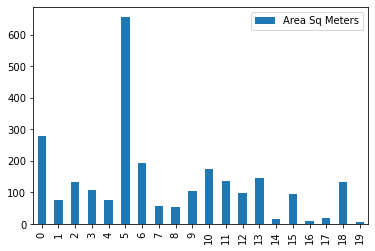

In [16]:
df.plot(kind = 'bar')

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [18]:
x = df['Subclass']
y = df['Area Sq Meters']

In [19]:
x_pos = [i for i, _ in enumerate(x)]

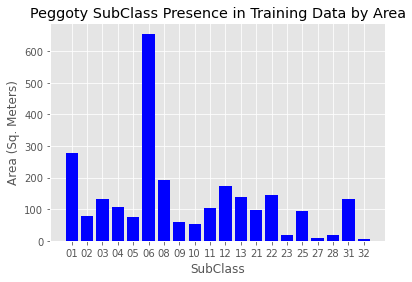

<Figure size 432x288 with 0 Axes>

In [20]:
plt.bar(x_pos, y, color = 'blue')
plt.xlabel('SubClass')
plt.ylabel('Area (Sq. Meters)')
plt.title('Peggoty SubClass Presence in Training Data by Area')

plt.xticks(x_pos, x)

fig1 = plt.gcf()
plt.show()
plt.draw()

fig1.savefig("D:\Documents\Test\Peggoty_Subclass_Area_Bar.png", dpi=100)

In [21]:
fig1 = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [22]:
plt.show()

In [23]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [24]:
# fig1.savefig("D:\Documents\Test\Subclass_Area_Bar.png", dpi=100)

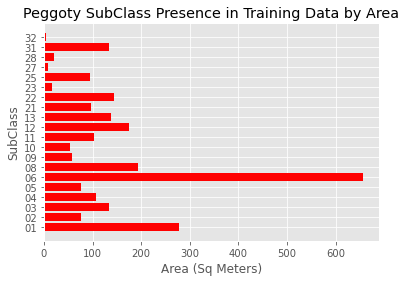

<Figure size 432x288 with 0 Axes>

In [25]:
plt.barh(x_pos, y, color = "red")
plt.ylabel("SubClass")
plt.xlabel("Area (Sq Meters)")
plt.title('Peggoty SubClass Presence in Training Data by Area')

plt.yticks(x_pos, x)

fig2 = plt.gcf()
plt.show()
plt.draw()

fig2.savefig("D:\Documents\Test\Peggoty_Subclass_Area_BarH.png", dpi=100)

plt.show()